# Introduction to FastHenryHelper

## Load the modules.

In [2]:
using FastHenryHelper
using Plots; gr() 

Plots.GRBackend()

## Creating a simple group

FastHenry commands are julia types which show thier command.  In FastHenryHelper these are all subtypes of the supertype `Element`.

In [3]:
n1 = Node(10,0,0)
# Since a name was not specified, _1 was automatically generated.
# x, y, and z must always be specified.  Default not allowed for x,y or z. 

N_1 x=1.000000000e+01 y=0.000000000e+00 z=0.000000000e+00


A name can be specified as the first parameter.

In [4]:
n2 = Node(:abcd,0,0,0)

Nabcd x=0.000000000e+00 y=0.000000000e+00 z=0.000000000e+00


Segments connect nodes.
Keyword parameters match the [FastHenry](https://github.com/ediloren/FastHenry2/blob/master/doc/FastHenry_User_Guide.pdf) keywords.

In [5]:
s1 = Segment(n1, n2, w=10, h=20, nwinc=5, nhinc=7)

E_1 N_2 Nabcd
+  w=1.000000000e+01 h=2.000000000e+01 nhinc=7 nwinc=5


Parameters may also be passed as a `SegmentParameters` object.

In [6]:
sp1 = SegmentParameters(w=10, h=20, nwinc=5, nhinc=7)
s1 = Segment(n1, n2, sp1)

E_1 N_2 Nabcd
+  w=1.000000000e+01 h=2.000000000e+01 nhinc=7 nwinc=5


`SegmentParameters` may be specified by the keyword parameters that differ from another `SegmentParameters` object.

In [7]:
sp2 = SegmentParameters(sp1,w=5,h=2) # same as sp1 with different width and height
s2 = Segment(n1, n2, sp2)

E_1 N_2 Nabcd
+  w=5.000000000e+00 h=2.000000000e+00 nhinc=7 nwinc=5


Elements can be collected into groups.  Auto-generated names are unique within the `Group` `show` is called on.  `Group`s may be transformed (rotated, translated, etc.).  `Group`s may be nested within each other (`Group` is a subtype of `Element`). 

In [8]:
g1 = Group([n1,n2,s2])
g1 = Group(elements = [n1,n2,s2]) # or use keyword argument

N_1 x=1.000000000e+01 y=0.000000000e+00 z=0.000000000e+00
Nabcd x=0.000000000e+00 y=0.000000000e+00 z=0.000000000e+00
E_2 N_1 Nabcd
+  w=5.000000000e+00 h=2.000000000e+00 nhinc=7 nwinc=5


Lets take a look.

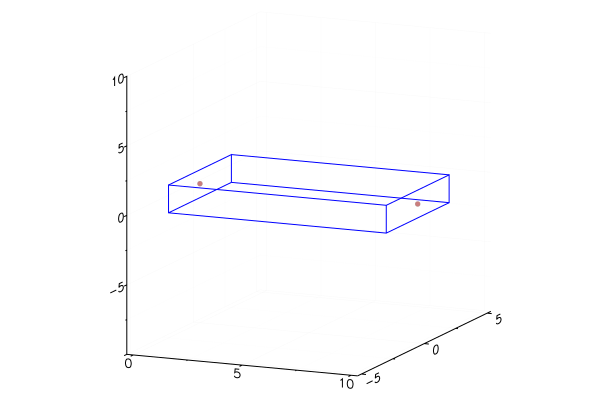

In [9]:
plot(g1)

Rotate group g1 π/4 around y and z azis and translate by 10 along x azis.

In [10]:
transformmatrix = ry(π/4) * rz(π/4) * txyz(10,0,0)
transform!(g1,transformmatrix)
# note: the wx, wy, wz vector for the segment has rotated from default and all 
# automatically generated names are unique.
g1

N_1 x=1.000000000e+01 y=-1.414213562e+01 z=1.000000000e+01
Nabcd x=5.000000000e+00 y=-7.071067812e+00 z=5.000000000e+00
E_2 N_1 Nabcd
+  w=5.000000000e+00 h=2.000000000e+00 nhinc=7 nwinc=5
+  wx=-5.000000000e-01 wy=-7.071067812e-01 wz=-5.000000000e-01


Plot after transform.

In [11]:
plot(g1);gui()

## Creating a Group with repetitive geometry

Create a square loop in the xy plane with a gap at the origin

In [12]:
n1 = Node(0,-1,0)
n2 = Node(0,-10,0)
n3 = Node(10,-10,0)
n4 = Node(10,10,0)
n5 = Node(0,10,0)
n6 = Node(0,1,0)
sp = SegmentParameters(h=2,w=3)
s1 = Segment(n1,n2,sp)
s2 = Segment(n2,n3,sp)
s3 = Segment(n3,n4,sp)
s4 = Segment(n4,n5,sp)
s5 = Segment(n5,n6,sp)
loop = Group([n1,n2,n3,n4,n5,n6,s1,s2,s3,s4,s5])

N_1 x=0.000000000e+00 y=-1.000000000e+00 z=0.000000000e+00
N_2 x=0.000000000e+00 y=-1.000000000e+01 z=0.000000000e+00
N_3 x=1.000000000e+01 y=-1.000000000e+01 z=0.000000000e+00
N_4 x=1.000000000e+01 y=1.000000000e+01 z=0.000000000e+00
N_5 x=0.000000000e+00 y=1.000000000e+01 z=0.000000000e+00
N_6 x=0.000000000e+00 y=1.000000000e+00 z=0.000000000e+00
E_7 N_1 N_2
+  w=3.000000000e+00 h=2.000000000e+00
E_8 N_2 N_3
+  w=3.000000000e+00 h=2.000000000e+00
E_9 N_3 N_4
+  w=3.000000000e+00 h=2.000000000e+00
E_10 N_4 N_5
+  w=3.000000000e+00 h=2.000000000e+00
E_11 N_5 N_6
+  w=3.000000000e+00 h=2.000000000e+00


Plot the loop

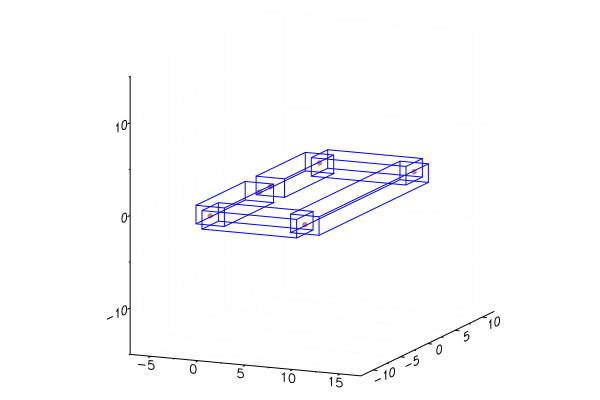

In [13]:
plot(loop)

Groups have a dictionary of terminals, nodes which are external connection points, for the group.  In this case n1 and n6 are the terminals.

In [14]:
t = terms(loop)
t[:a] = n1
t[:b] = n6;

`loop` can be defined more concisely using `element` and `terms` keyword arguments and the function  `connectnodes`.

In [15]:
sp = SegmentParameters(h=2,w=3)
n1 = Node(0,-1,0)
n2 = Node(0,-10,0)
n3 = Node(10,-10,0)
n4 = Node(10,10,0)
n5 = Node(0,10,0)
n6 = Node(0,1,0)
loop = Group(
    elements = [n1, n2, n3, n4, n5, n6, connectnodes([n1,n2,n3,n4,n5,n6],sp)...],
    terms = Dict(:a=>n1,:b=>n6)
)

N_1 x=0.000000000e+00 y=-1.000000000e+00 z=0.000000000e+00
N_2 x=0.000000000e+00 y=-1.000000000e+01 z=0.000000000e+00
N_3 x=1.000000000e+01 y=-1.000000000e+01 z=0.000000000e+00
N_4 x=1.000000000e+01 y=1.000000000e+01 z=0.000000000e+00
N_5 x=0.000000000e+00 y=1.000000000e+01 z=0.000000000e+00
N_6 x=0.000000000e+00 y=1.000000000e+00 z=0.000000000e+00
E_7 N_1 N_2
+  w=3.000000000e+00 h=2.000000000e+00
E_8 N_2 N_3
+  w=3.000000000e+00 h=2.000000000e+00
E_9 N_3 N_4
+  w=3.000000000e+00 h=2.000000000e+00
E_10 N_4 N_5
+  w=3.000000000e+00 h=2.000000000e+00
E_11 N_5 N_6
+  w=3.000000000e+00 h=2.000000000e+00


Shift loop 5 along x axis

In [16]:
transform!(loop,txyz(5,0,0))

Create array of 8 loops each rotated π/4 around y axis

In [17]:
tm = ry(π/4) # transform matrix to rotate π/4 around the y axis
loops = Array{Group}(undef, 8)
for i in 1:8
    transform!(loop,tm)
    loops[i] = deepcopy(loop)
end

Create a group of the loops

In [18]:
loopsgroup = Group(loops)

N_1 x=3.535533906e+00 y=-1.000000000e+00 z=3.535533906e+00
N_2 x=3.535533906e+00 y=-1.000000000e+01 z=3.535533906e+00
N_3 x=1.060660172e+01 y=-1.000000000e+01 z=1.060660172e+01
N_4 x=1.060660172e+01 y=1.000000000e+01 z=1.060660172e+01
N_5 x=3.535533906e+00 y=1.000000000e+01 z=3.535533906e+00
N_6 x=3.535533906e+00 y=1.000000000e+00 z=3.535533906e+00
E_7 N_1 N_2
+  w=3.000000000e+00 h=2.000000000e+00
+  wx=7.071067812e-01 wy=0.000000000e+00 wz=7.071067812e-01
E_8 N_2 N_3
+  w=3.000000000e+00 h=2.000000000e+00
+  wx=0.000000000e+00 wy=1.000000000e+00 wz=0.000000000e+00
E_9 N_3 N_4
+  w=3.000000000e+00 h=2.000000000e+00
+  wx=-7.071067812e-01 wy=0.000000000e+00 wz=-7.071067812e-01
E_10 N_4 N_5
+  w=3.000000000e+00 h=2.000000000e+00
+  wx=0.000000000e+00 wy=-1.000000000e+00 wz=0.000000000e+00
E_11 N_5 N_6
+  w=3.000000000e+00 h=2.000000000e+00
+  wx=7.071067812e-01 wy=0.000000000e+00 wz=7.071067812e-01
N_12 x=8.873450063e-16 y=-1.000000000e+00 z=5.000000000e+00
N_13 x=8.873450063e-16 y=-1.0

Plot the 8 loops

┌ Warning: You created n=210 groups... Is that intended?
└ @ Plots C:\Users\Chris\.julia\packages\Plots\EJpx2\src\args.jl:1073


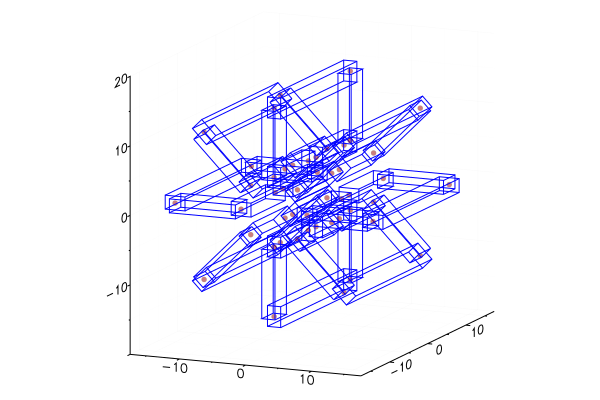

In [19]:
plot(loopsgroup)

Define a port for each loop.  Ports could have been defined as the loops were created.  This way demonstrates the use of terminals.

In [20]:
ex = []
for loop in loops
    push!(ex, External(loop[:a],loop[:b]))  # use terminals we defined
end
externalgroup = Group(ex)

.external N_1 N_2 
.external N_3 N_4 
.external N_5 N_6 
.external N_7 N_8 
.external N_9 N_10 
.external N_11 N_12 
.external N_13 N_14 
.external N_15 N_16 


Create top level group

In [21]:
eightloops = Group(
    elements = [
        Units("mm"),
        Default(SegmentParameters(sigma=62.1e6*1e-3, nwinc=7, nhinc=5)),
        loopsgroup,
        externalgroup,
        Freq(min=1e-1, max=1e9, ndec=0.05),
        End()
    ] 
);

Write to file

In [22]:
open("eightloops.inp","w") do io
    show(io,eightloops)
end

## Group units

In addition to the `Units` type, units may be specified for a `Group` using the units keyword.  Group units only apply to the `elements` in the `Group`.

In [23]:
groupunitexample = Group(
    elements = [
        Units("cm"),
        Node(1,0,0),
        Group(
            elements = [
                Node(20,0,0)
            ],
            units = Units("mm")
        ),
        Node(3,0,0)
    ]
)

.units cm
N_1 x=1.000000000e+00 y=0.000000000e+00 z=0.000000000e+00
.units mm
N_2 x=2.000000000e+01 y=0.000000000e+00 z=0.000000000e+00
.units cm
N_3 x=3.000000000e+00 y=0.000000000e+00 z=0.000000000e+00
